# 7.3. Padding and Stride

- Padding = preenchimento. Útil para evitar a diminuição da saída com relação a entrada.
- Stride = passada. Convoluções strides fazem com que a saída seja menor que a entrada.

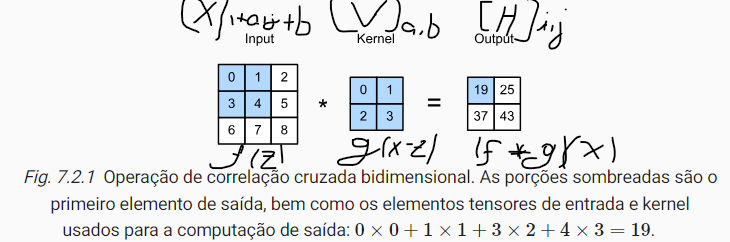

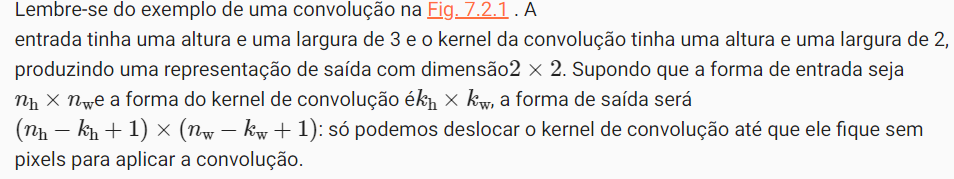


Como motivação, observe que, como os kernels geralmente têm largura e altura maiores que 1, depois de aplicar muitas convoluções sucessivas, tendemos a acabar com saídas que são consideravelmente menores do que nossa entrada.

Se começarmos com uma 240x240 imagem de pixel, dez camadas de 5x5 ,as convoluções reduzem a imagem para 200x200 pixels, cortando 30% da imagem e com isso obliterando (apagando) qualquer informação interessante sobre os limites da imagem original. 

In [1]:
import torch
from torch import nn

# 7.3.1. Padding (Preenchimento)

Conforme descrito acima, um problema complicado ao aplicar camadas convolucionais é que tendemos a perder pixels no perímetro da nossa imagem.

Como normalmente usamos kernels pequenos, para qualquer convolução dada podemos perder apenas alguns pixels, mas isso pode aumentar à medida que aplicamos muitas camadas convolucionais sucessivas. 

- Uma solução direta para esse problema é adicionar pixels extras de preenchimento ao redor do limite da nossa imagem de entrada, aumentando assim o tamanho efetivo da imagem. Normalmente, definimos os valores dos pixels extras como zero.

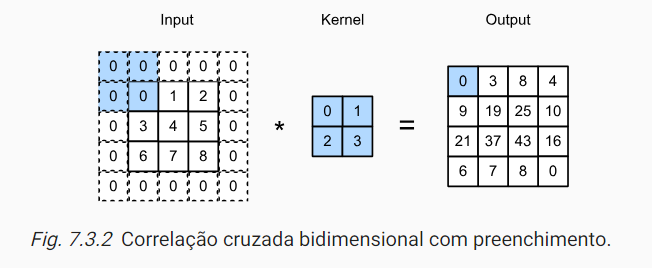

A saída aumenta para 4x4.

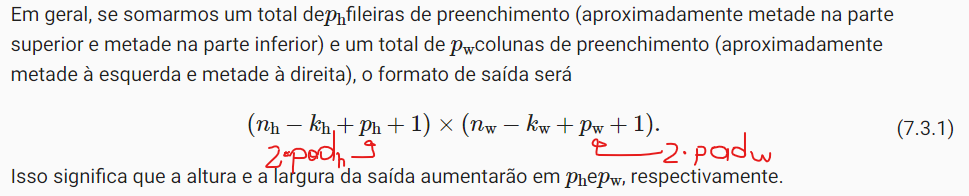

- pw são a quantidade de fileiras horizontais adicionadas, ou seja, a quantidade de linhas.
- ph são a quantidade de fileiras verticais adicionadas, ou seja, a quantidade de colunas.

CNNs geralmente usam kernels de convolução com valores ímpares de altura e largura, como 1, 3, 5 ou 7. Escolher tamanhos ímpares de kernel tem o benefício de podermos preservar a dimensionalidade enquanto preenchemos com o mesmo número de linhas na parte superior e inferior, e o mesmo número de colunas à esquerda e à direita.

No exemplo a seguir, criamos:
- uma camada convolucional bidimensional (kernel) com altura e largura de 3 e
- aplicamos 1 pixel de padding em todos os lados (na entrada).

Dada uma entrada com altura e largura de 8, descobrimos que a altura e largura da saída também são 8.

In [6]:
# -------------------------------------------------------------------------------------
import torch
from torch import nn
from d2l import torch as d2l
# -------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------
# We define a helper function to calculate convolutions. It initializes the
# convolutional layer weights and performs corresponding dimensionality
# elevations and reductions on the input and output
def comp_conv2d(conv2d, X):
    # (1, 1) indicates that batch size and the number of channels are both 1
    X = X.reshape((1, 1) + X.shape)                           # torch.Size([1, 1, 8, 8])
    Y = conv2d(X)
    # Strip the first two dimensions: examples and channels
    return Y.reshape(Y.shape[2:])

# 1 row and column is padded on either side, so a total of 2 rows or columns are added
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1)           # kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)
# 1 de cada lado em h: total 2  (Vide 7.3.1) --> 8-3+1:6, faltam 2: 1 de cada lado. Portanto, padding=1.
# 1 de cada lado em w: total 2  (Vide 7.3.1) --> 8-3+1:6, faltam 2: 1 de cada lado. Portanto, padding=1.

X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape                                  # saída Y
# -------------------------------------------------------------------------------------


torch.Size([8, 8])

Quando a altura e a largura do kernel de convolução são diferentes, podemos fazer com que a saída e a entrada tenham a mesma altura e largura definindo números de preenchimento diferentes para altura e largura.

In [7]:
# We use a convolution kernel with height 5 and width 3. The padding on either side of the height and width are 2 and 1, respectively
conv2d = nn.LazyConv2d(1, kernel_size=(5, 3), padding=(2, 1))  
# 2 de cada lado em h: total 4  (Vide 7.3.1) --> 8-5+1:4, faltam 4: 2 de cada lado. Portanto, padding=2.
# 1 de cada lado em w: total 2  (Vide 7.3.1) --> 8-3+1:6, faltam 2: 1 de cada lado. Portanto, padding=1.

comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

SEM PADDING:

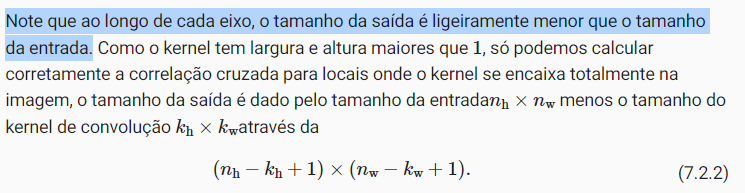

COM PADDING:

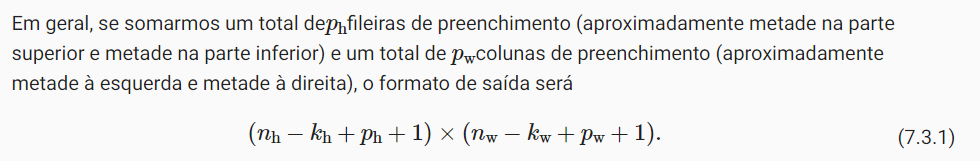

# 7.3.2. Stride (passo)

Ao calcular a correlação cruzada, começamos com a janela de convolução no canto superior esquerdo do tensor de entrada e, em seguida, deslizamos sobre todos os locais, tanto para baixo quanto para a direita. Nos exemplos anteriores, deslizamos um elemento por vez por padrão. No entanto, às vezes, seja para eficiência computacional ou porque desejamos reduzir a amostragem, movemos nossa janela mais de um elemento por vez, pulando os locais intermediários. Isso é particularmente útil se o kernel de convolução for grande, pois captura uma grande área da imagem subjacente.

- Nós nos referimos ao número de linhas e colunas percorridas por slide como stride. Até agora, usamos strides de 1, tanto para altura quanto para largura. Às vezes, podemos querer usar um stride maior.

Operação de correlação cruzada bidimensional com um stride de 3 verticalmente e 2 horizontalmente: 

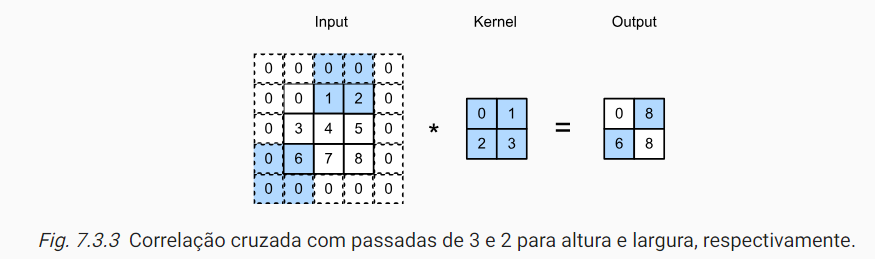



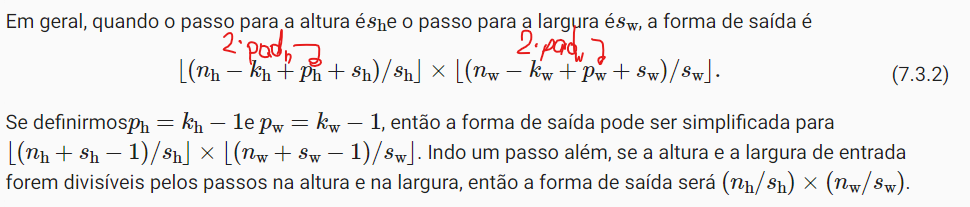

OBS: EM 7.3.2, CASO A DIVISÃO SEJA QUEBRADA, CONSIDERA-SE APENAS O VALOR INTEIRO: DIVISÃO INTEIRA

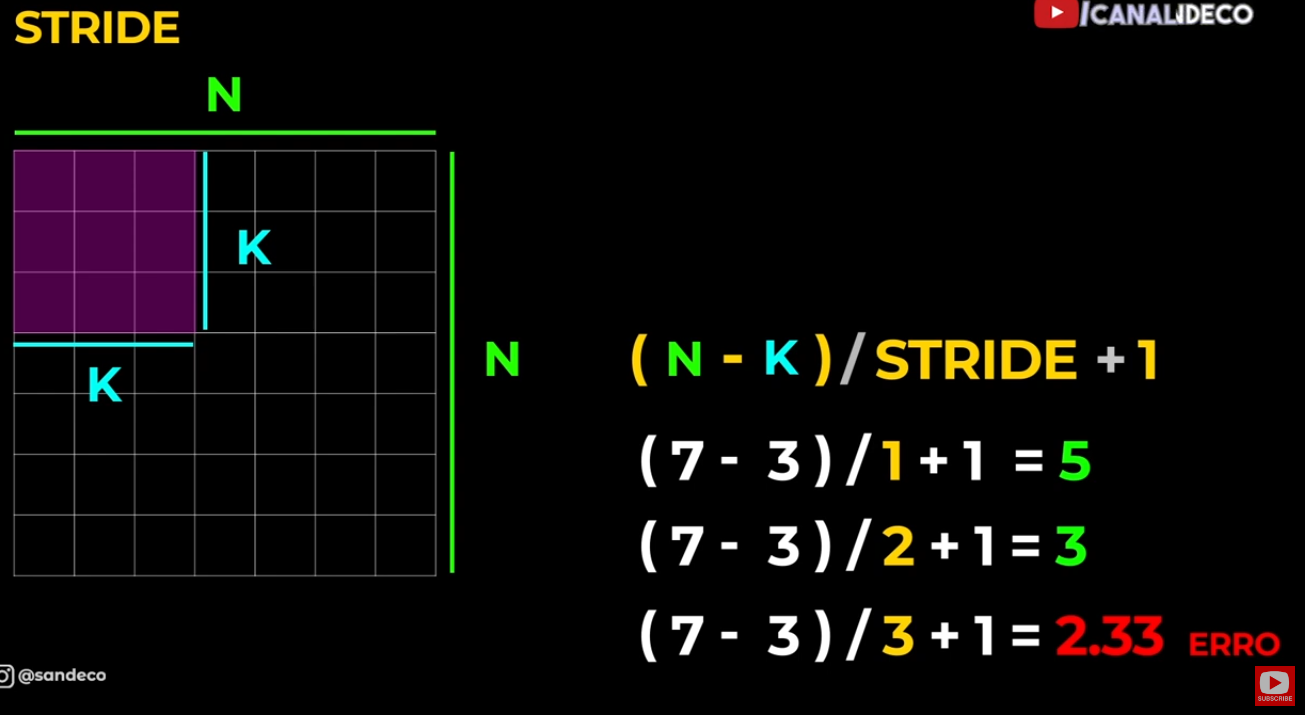



Abaixo, definimos os passos na altura e na largura como 2, reduzindo assim pela metade a altura e a largura de entrada.

In [9]:
X.shape

torch.Size([8, 8])

In [10]:
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1, stride=2) # kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

Vejamos um exemplo um pouco mais complicado.

In [11]:
conv2d = nn.LazyConv2d(1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

# 7.3.3. Resumo e Discussão

- O preenchimento pode aumentar a altura e a largura da saída. Isso é frequentemente usado para dar à saída a mesma altura e largura da entrada para evitar o encolhimento indesejado da saída. Comumente definimos ph = pw, caso em que simplesmente declaramos que escolhemos o preenchimento p.

- Uma convenção semelhante se aplica às passadas. Quando a passada horizontal sh e passo vertical sw, falamos simplesmente sobre passada. O passo pode reduzir a resolução da saída, por exemplo, reduzindo a altura e a largura da saída para apenas 1/n.

- Até agora, todo o preenchimento que discutimos simplesmente estendeu imagens com zeros. Isso tem um benefício computacional significativo, pois é trivial de realizar. Ao mesmo tempo, ele permite que as CNNs codifiquem informações de posição implícitas dentro de uma imagem, simplesmente aprendendo onde está o "espaço em branco". 




# 7.3.4. Exercícios

# Ex. 1 - Dado o exemplo de código final nesta seção com tamanho do kernel (3,5), preenchimento (0,1), e passo (3,4), calcule a forma de saída para verificar se ela é consistente com o resultado experimental.



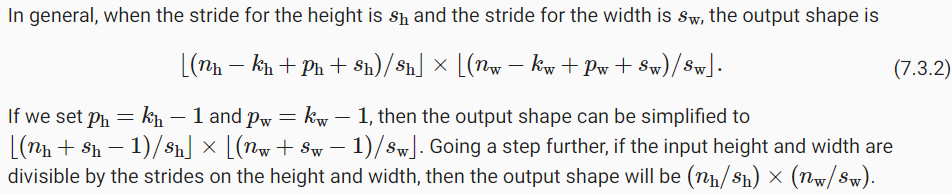



In [15]:
# kernel_size=(3, 5), padding=(0, 1), stride=(3, 4)
# x=n: (8,8)
# k: (3,5)
# p: (0,1)
# s: (3,4)

h = (8 - 3 + (2*0) + 3) // 3   # Divisão inteira
print(h)

w = (8 - 5 + (2*1) + 4) // 4   # Divisão inteira
print(w)

2
2


Portanto, saída (2x2).

In [33]:
import torch
from torch import nn

def comp_conv2d(conv2d, X):
    # (1, 1) indicates that batch size and the number of channels are both 1
    X = X.reshape((1, 1) + X.shape)
    Y = conv2d(X)
    # Strip the first two dimensions: examples and channels
    return Y.reshape(Y.shape[2:])

# 1 row and column is padded on either side, so a total of 2 rows or columns
# are added
conv2d = nn.LazyConv2d(1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

# Ex. 2 - Para sinais de áudio, a que corresponde um passo de 2?


Matriz de saída menor que a de entrada e, portanto, compressão do sinal de aúdio.

Stride 1 retem mais informações, portanto, com mais qualidade, entretanto, é computacionalmente mais caro.

# Ex. 3 - Implemente o preenchimento espelhado, ou seja, preenchimento onde os valores das bordas são simplesmente espelhados para estender os tensores.

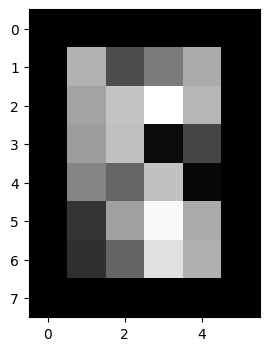

In [21]:
# Abordagem 1: Preenchimento com zeros.
# -------------------------------------------------------------------------------------
import torch
from d2l import torch as d2l
import matplotlib.pyplot as plt
# -------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------
# X = torch.arange(1,10).reshape(3,3)
X = torch.rand(6,4)
w = X.shape[0]
h = X.shape[1]

Z = torch.zeros(w+2,h+2)

Z[1:w+1,1:h+1] = X
# -------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------
fig=plt.figure(figsize=(4, 4))
plt.imshow(Z, cmap=plt.cm.gray)
# -------------------------------------------------------------------------------------


Text(0.5, 1.0, 'X com preenchimeno espelhado')

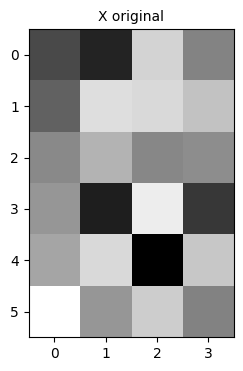

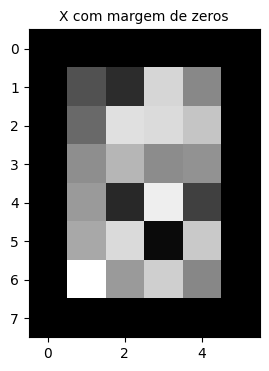

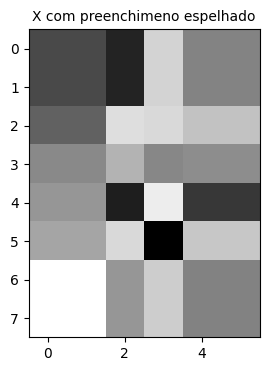

In [22]:
# Abordagem 2: Espelhamento da borda
# -------------------------------------------------------------------------------------
import torch
from d2l import torch as d2l
import matplotlib.pyplot as plt
# -------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------
X = torch.rand(6,4)
# X = torch.arange(1,10).reshape(3,3)
fig=plt.figure(figsize=(4, 4))
plt.imshow(X, cmap=plt.cm.gray)
plt.title('X original', fontsize=10)


w = X.shape[0]   # linhas
h = X.shape[1]   # colunas

Z = torch.zeros(w+2,h+2)

Z[1:w+1,1:h+1] = X
# -------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------
fig=plt.figure(figsize=(4, 4))
plt.imshow(Z, cmap=plt.cm.gray)
plt.title('X com margem de zeros', fontsize=10)
# -------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------

for i in range(0,h+1):
    # Primeira linha de Z:
    Z[0,i] = X[0,i-1]
    Z[0,i] = X[0,i-1]
    Z[0,i] = X[0,i-1]

    # ùltima linha de Z:
    Z[-1,i] = X[-1,i-1]
    Z[-1,i] = X[-1,i-1]
    Z[-1,i] = X[-1,i-1]

for j in range(0,w+1):
    #Primeira coluna de Z:
    Z[j,0] = X[j-1,0]
    Z[j,0] = X[j-1,0]
    Z[j,0] = X[j-1,0]

    #ùltima coluna de Z:
    Z[j,-1] = X[j-1,-1]
    Z[j,-1] = X[j-1,-1]
    Z[j,-1] = X[j-1,-1]

# -------
# Quinas:
Z[0,0] = X[0,0]
Z[0,-1] = X[0,-1]
Z[-1,0] = X[-1,0]
Z[-1,-1] = X[-1,-1]
# -------------------------------------------------------------------------------------

fig=plt.figure(figsize=(4, 4))
plt.imshow(Z, cmap=plt.cm.gray)
plt.title('X com preenchimeno espelhado', fontsize=10)

# Ex. 4 - Quais são os benefícios computacionais de um passo maior que 1?


Compressão, baixa amostragem, redução de custo computacional e menor espaço de armazenamento. Entretanto, causa perda de informação 

# Ex. 5 - Quais poderiam ser os benefícios estatísticos de uma passada maior que 1?

- Redução de sobreposição
- Redução na redundancia na extração de características
- Diversidade estatística
- Supressão de ruído
- Redução de dimensão, capturando apenas informações mais importantes após o treinamento da rede

Entretanto, a escolha do stride depende dos dados, da tarefa e da arquitetura. Conforme o caso, stride maior que 1 traz prejuízo.

# Ex. 6 - Como você implementaria um passo de 1/2? A que corresponde? Quando isso seria útil?

Ao invés de 1 movimento a cada passo, permaneceria no mesmo local por 2 passos. Isto, ao invés de reduzir faz aumentar o tamanho da saída.

-------------------------------------------

To implement a stride of 1/2 using PyTorch, you can use the transposed convolution operation, also known as the fractionally strided convolution or deconvolution operation. Here’s how you can achieve this:

In [28]:
import torch
import torch.nn as nn

# Input tensor
input_tensor = torch.randn(1, 3, 16, 16)  # Example: 1 batch, 3 channels, 16x16 input

# Transposed convolution layer with stride of 1/2
transposed_conv = nn.ConvTranspose2d(in_channels=3, out_channels=3, kernel_size=3, stride=2, padding=1)

# Applying the transposed convolution
output_tensor = transposed_conv(input_tensor)

# Print the shapes of input and output tensors
print("Input tensor shape:", input_tensor.shape)
print("Output tensor shape:", output_tensor.shape)

Input tensor shape: torch.Size([1, 3, 16, 16])
Output tensor shape: torch.Size([1, 3, 31, 31])


Transposed convolution effectively “upsamples” the input tensor by creating larger output feature maps. The stride of 2 in the transposed convolution results in an output tensor with dimensions that are approximately twice as large as the input tensor along each dimension.

# Outras respostas

https://pandalab.me/archives/padding_and_stride

# Referências:

https://www.youtube.com/watch?v=-ojAu7UOXfQ

https://www.youtube.com/watch?v=pj9-rr1wDhM

# Anexo:

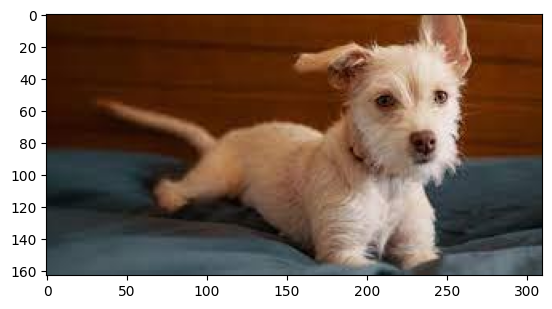

(310, 163)
tensor([[[0.2353, 0.2353, 0.2353,  ..., 0.4588, 0.4588, 0.4588],
         [0.2353, 0.2353, 0.2353,  ..., 0.4196, 0.4196, 0.4196],
         [0.2314, 0.2314, 0.2314,  ..., 0.3961, 0.3961, 0.3961],
         ...,
         [0.2353, 0.2353, 0.2353,  ..., 0.2510, 0.2588, 0.2627],
         [0.2353, 0.2353, 0.2353,  ..., 0.2510, 0.2588, 0.2627],
         [0.2353, 0.2353, 0.2353,  ..., 0.2510, 0.2588, 0.2627]],

        [[0.0902, 0.0902, 0.0902,  ..., 0.2078, 0.2078, 0.2078],
         [0.0902, 0.0902, 0.0902,  ..., 0.1686, 0.1686, 0.1686],
         [0.0941, 0.0941, 0.0941,  ..., 0.1451, 0.1451, 0.1451],
         ...,
         [0.3098, 0.3098, 0.3098,  ..., 0.3059, 0.3098, 0.3176],
         [0.3098, 0.3098, 0.3098,  ..., 0.3020, 0.3098, 0.3137],
         [0.3098, 0.3098, 0.3098,  ..., 0.3020, 0.3098, 0.3137]],

        [[0.0275, 0.0275, 0.0275,  ..., 0.0588, 0.0588, 0.0588],
         [0.0275, 0.0275, 0.0275,  ..., 0.0196, 0.0196, 0.0196],
         [0.0196, 0.0196, 0.0196,  ..., 0.0000,

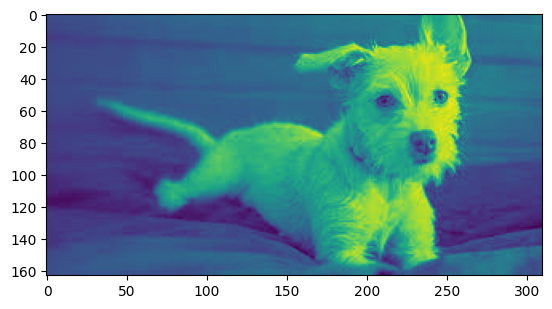

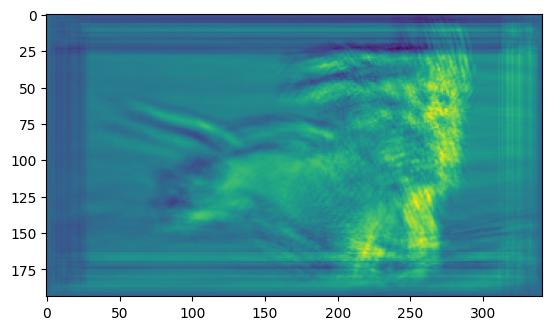

In [35]:
import numpy as np
from PIL import Image
from torchvision import transforms
from pathlib import Path
import matplotlib.pyplot as plt
from torchvision.transforms import v2

import torch
from torch import nn
# ----------------------------------------------------------------------------------------------
# original_image = Image.open(img)
original_image = Image.open(Path('G:\\Meu Drive\\0-DOUTORADO\\0-Python\\PycharmProjects\\Deep_Learning\\0_Datasets\\cat_dog\\archive\\train')
                            / 'dog_100.jpg')

plt.figure()
plt.imshow(original_image)
plt.show()
print(original_image.size)
# ----------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------
# Converte em tensor:
trans = transforms.Compose([transforms.ToTensor()])
tensor_imag = trans(original_image)
print(tensor_imag)
print(tensor_imag.shape)
# ----------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------
def comp_conv2d(conv2d, X):
    # (1, 1) indicates that batch size and the number of channels are both 1
    X = X.reshape((1,1) + X.shape)
    Y = conv2d(X)
    # Strip the first two dimensions: examples and channels
    return Y.reshape(Y.shape[2:])

# 1 row and column is padded on either side, so a total of 2 rows or columns
# are added
conv2d = nn.LazyConv2d(1, kernel_size=(30, 30), padding=(30, 30), stride=(1, 1))

# X = torch.rand(size=(8, 8))
X = tensor_imag[0]
plt.figure()
plt.imshow(X)

comp_conv2d(conv2d, X).shape
out = comp_conv2d(conv2d, X)
out1 = out.data                      # utiliza apenas os dados, retirando o grad_fn
# ----------------------------------------------------------------------------------------------
plt.figure()
plt.imshow(out1)
# plt.imshow(out, cmap=plt.cm.gray)

# ----------------------------------------------------------------------------------------------



----------------------------------------------

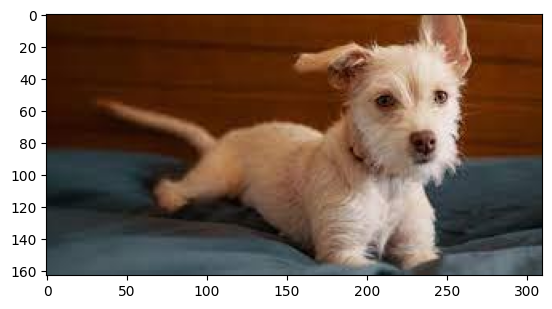

(310, 163)
tensor([[[0.2353, 0.2353, 0.2353,  ..., 0.4588, 0.4588, 0.4588],
         [0.2353, 0.2353, 0.2353,  ..., 0.4196, 0.4196, 0.4196],
         [0.2314, 0.2314, 0.2314,  ..., 0.3961, 0.3961, 0.3961],
         ...,
         [0.2353, 0.2353, 0.2353,  ..., 0.2510, 0.2588, 0.2627],
         [0.2353, 0.2353, 0.2353,  ..., 0.2510, 0.2588, 0.2627],
         [0.2353, 0.2353, 0.2353,  ..., 0.2510, 0.2588, 0.2627]],

        [[0.0902, 0.0902, 0.0902,  ..., 0.2078, 0.2078, 0.2078],
         [0.0902, 0.0902, 0.0902,  ..., 0.1686, 0.1686, 0.1686],
         [0.0941, 0.0941, 0.0941,  ..., 0.1451, 0.1451, 0.1451],
         ...,
         [0.3098, 0.3098, 0.3098,  ..., 0.3059, 0.3098, 0.3176],
         [0.3098, 0.3098, 0.3098,  ..., 0.3020, 0.3098, 0.3137],
         [0.3098, 0.3098, 0.3098,  ..., 0.3020, 0.3098, 0.3137]],

        [[0.0275, 0.0275, 0.0275,  ..., 0.0588, 0.0588, 0.0588],
         [0.0275, 0.0275, 0.0275,  ..., 0.0196, 0.0196, 0.0196],
         [0.0196, 0.0196, 0.0196,  ..., 0.0000,

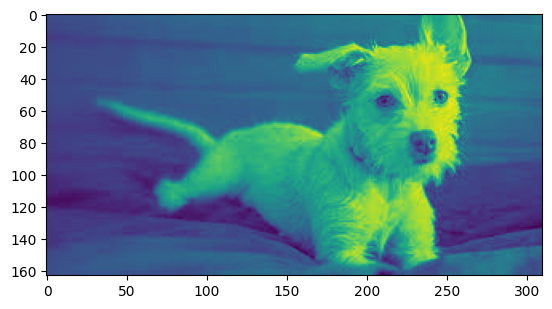

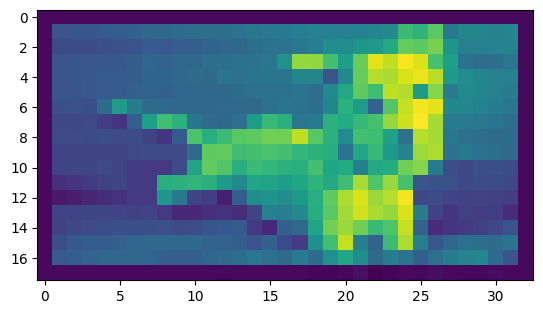

In [45]:
import numpy as np
from PIL import Image
from torchvision import transforms
from pathlib import Path
import matplotlib.pyplot as plt
from torchvision.transforms import v2

import torch
from torch import nn
# ----------------------------------------------------------------------------------------------
# original_image = Image.open(img)
original_image = Image.open(Path('G:\\Meu Drive\\0-DOUTORADO\\0-Python\\PycharmProjects\\Deep_Learning\\0_Datasets\\cat_dog\\archive\\train')
                            / 'dog_100.jpg')

plt.figure()
plt.imshow(original_image)
plt.show()
print(original_image.size)
# ----------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------
# Converte em tensor:
trans = transforms.Compose([transforms.ToTensor()])
tensor_imag = trans(original_image)
print(tensor_imag)
print(tensor_imag.shape)
# ----------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------
def comp_conv2d(conv2d, X):
    # (1, 1) indicates that batch size and the number of channels are both 1
    X = X.reshape((1,1) + X.shape)
    Y = conv2d(X)
    # Strip the first two dimensions: examples and channels
    return Y.reshape(Y.shape[2:])

# 1 row and column is padded on either side, so a total of 2 rows or columns
# are added
conv2d = nn.LazyConv2d(1, kernel_size=(10, 10), padding=(10, 10), stride=(10, 10))
# X = torch.rand(size=(8, 8))
X = tensor_imag[0]
plt.figure()
plt.imshow(X)

print(comp_conv2d(conv2d, X).shape)
out = comp_conv2d(conv2d, X)
out1 = out.data                      # utiliza apenas os dados, retirando o grad_fn
# ----------------------------------------------------------------------------------------------
plt.figure()
plt.imshow(out1)
# plt.imshow(out, cmap=plt.cm.gray)

# ----------------------------------------------------------------------------------------------



# ANIMAÇÕES:

https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md